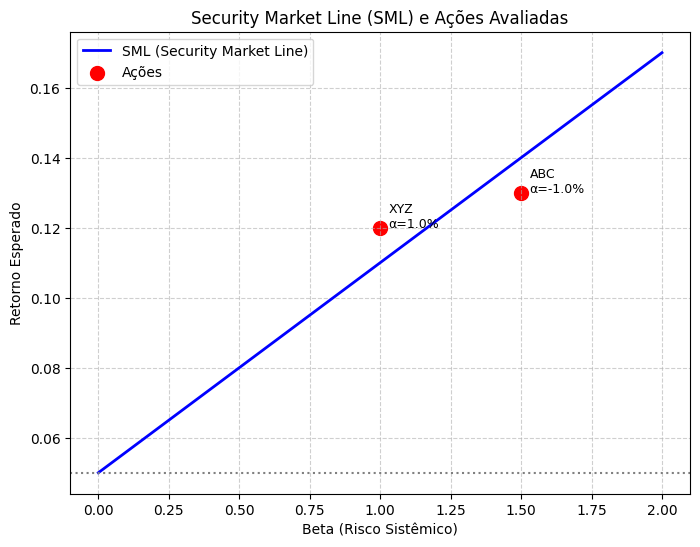

Ação XYZ:
  Beta = 1.0
  Retorno esperado (real) = 12.00%
  Retorno CAPM = 11.00%
  Alfa = 1.00%
----------------------------------------
Ação ABC:
  Beta = 1.5
  Retorno esperado (real) = 13.00%
  Retorno CAPM = 14.00%
  Alfa = -1.00%
----------------------------------------


In [1]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 1. Dados fornecidos
# ===============================

Rf = 0.05   # taxa livre de risco (5%)
Rm = 0.11   # retorno esperado do mercado (11%)

# Ações
acoes = {
    "XYZ": {"retorno_esperado": 0.12, "beta": 1.0},
    "ABC": {"retorno_esperado": 0.13, "beta": 1.5}
}

# ===============================
# 2. Cálculo do retorno esperado pelo CAPM e alfa
# ===============================

for nome, dados in acoes.items():
    beta = dados["beta"]
    retorno_CAPM = Rf + beta * (Rm - Rf)
    alfa = dados["retorno_esperado"] - retorno_CAPM
    dados["retorno_CAPM"] = retorno_CAPM
    dados["alfa"] = alfa

# ===============================
# 3. Gerar pontos da SML (linha teórica do CAPM)
# ===============================

betas = np.linspace(0, 2, 100)
retornos_SML = Rf + betas * (Rm - Rf)

# ===============================
# 4. Plotar o gráfico
# ===============================

plt.figure(figsize=(8,6))
plt.plot(betas, retornos_SML, label='SML (Security Market Line)', color='blue', linewidth=2)
plt.scatter([dados["beta"] for dados in acoes.values()],
            [dados["retorno_esperado"] for dados in acoes.values()],
            color='red', marker='o', s=100, label='Ações')

# Anotar cada ação com alfa
for nome, dados in acoes.items():
    plt.text(dados["beta"] + 0.03, dados["retorno_esperado"],
             f'{nome}\nα={dados["alfa"]*100:.1f}%', fontsize=9)

# ===============================
# 5. Personalizar o gráfico
# ===============================

plt.title('Security Market Line (SML) e Ações Avaliadas')
plt.xlabel('Beta (Risco Sistêmico)')
plt.ylabel('Retorno Esperado')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.axhline(Rf, color='gray', linestyle=':', label='Taxa Livre de Risco')

# Exibir gráfico
plt.show()

# ===============================
# 6. Mostrar resultados no terminal
# ===============================

for nome, dados in acoes.items():
    print(f"Ação {nome}:")
    print(f"  Beta = {dados['beta']}")
    print(f"  Retorno esperado (real) = {dados['retorno_esperado']*100:.2f}%")
    print(f"  Retorno CAPM = {dados['retorno_CAPM']*100:.2f}%")
    print(f"  Alfa = {dados['alfa']*100:.2f}%")
    print("-" * 40)
